# 1. Setting up your AOSLO

This notebook guides you through setting up and examining the parameters of your synthetic AOSLO. This will create the system parameters file and save it in the folder "System_parameters". 

These Jupyter notebooks use "system_parameters_demo.yaml" by default, which matches the AOSLO described in the ERICA publication:

Laura K. Young & Hannah E. Smithson, "Emulated retinal image capture (ERICA) to test, train and validate processing of retinal images," Sci Rep 11, 11225 (2021).
https://www.nature.com/articles/s41598-021-90389-y

and the related instrument paper:

Laura K. Young, Timothy J. Morris, Christopher D. Saunter, and Hannah E. Smithson, "Compact, modular and in-plane AOSLO for high-resolution retinal imaging," Biomed. Opt. Express 9, 4275-4293 (2018)
https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-9-9-4275&id=396246


First we start by importing the relevant modules:

In [1]:
# Set matplotlib up
%matplotlib inline

import numpy
import yaml
import os
import sys

from matplotlib import pyplot

from ERICA import AOSLO_system

# In these examples we will work from the current working directory
current_directory = os.getcwd()

## 1.1 The system parameter file

The system parameter file contains information about the AOSLO that you are trying to emulate, such as the imaging wavelength, pupil diameter, pinhole size and scanner configuration. The file (.yaml) is interpreted as a python dictionary, you'll see later how to retrieve information from it. 

An example system parameter file is given in the "System_parameters" directory. To create your own parameter file for your system you can copy and edit the file directly - yaml files are human readable and can be opened in a text editor. This is the easiest option, but be careful to maintain the same structure in the file. 

Alternatively you can create the parameter file from scratch using the example below. The system parameters are stored in a dictionary, the keys should not be altered but they should be self explanatory and they include the units in the name:
<ul>
<li><strong>'frequency_fast_scanner_Hz'</strong>: The frequency of the resonant scanner (Hz)</li>
<li><strong>'pinhole_diameter_Airy_radii'</strong>: The diameter of the confocal pinhole in units of the Airy radius.</li>
<li><strong>'microns_per_degree'</strong>: The conversion factor between angular and spatial units (microns/degree).</li>
<li><strong>'number_pixels_per_line'</strong>: The number of temporal samples per scan line. Here we consider a single scan line in one direction, i.e. half the period of the resonant scanner.</li>
<li><strong>'number_scan_lines_excluding_flyback'</strong>: The number of scan lines in the image, assuming that the return path of the slow scanner (i.e. the fast flyback of the galvo) is not included and assuming that only the scan lines in a single direction are used.</li>
<li><strong>'number_scan_lines_including_flyback'</strong>: The number of (single direction) scan lines in one complete cycle of the slow scanner, i.e., the ratio of the resonant scanner frequency (typically around 16 kHz) to the slow scanner frequency (typically around 30 Hz).</li>
<li><strong>'pixel_size_arcmin_y_x'</strong>: The size of a pixel (vertical, horizontal), which can be non-square (arcminutes).
<li><strong>'wavelength_m'</strong>: The wavelength of the imaging light (metres).</li>
<li><strong>'pupil_diameter_m'</strong>: The diameter of the eye pupil (metres)</li>
<li><strong>'noise_mean_normalised_graylevels'</strong>: The mean intensity value of a 'blank' frame containing only noise (gray levels, normalised to the range 0-1)</li>
<li><strong>'noise_stdev_normalised_graylevels'</strong>: The standard deviation of the intensity values of a 'blank' frame containing only noise (gray levels, normalised to the range 0-1).</li>
<li><strong>'bit_depth'</strong>: The bit depth of the intensity data (the default is 8-bit imaging).</li>
<li><strong>'proportion_saturated_pixels'</strong>: The proportion of samples that are saturated. This will vary between imaging sessions depending on the detector gain and illumination power etc.</li>
</ul>  



In [2]:
# Create the dictionary
parameters = {
    'frequency_fast_scanner_Hz' : 16000,
    'pinhole_diameter_Airy_radii' : 2.0,
    'microns_per_degree': 297.0,
    'number_pixels_per_line': 512,
    'number_scan_lines_excluding_flyback' : 512,
    'number_scan_lines_including_flyback' : 525,
    'pixel_size_arcmin_y_x' : [0.12, 0.12],
    'wavelength_m' : 8.4e-07,
    'pupil_diameter_m' : 7.0e-3,
    'noise_mean_normalised_graylevels' :0.35,
    'noise_stdev_normalised_graylevels' : 0.07,
    'bit_depth' : 8,
    'proportion_saturated_pixels' : 0.02,
    }


This can be saved as a yaml file (<span style='background-color:rgb(206,190,218)'>system parameter file</span>):

In [3]:
# Choose a name for your system parameter file
my_parameter_filename = 'system_parameters_myAOSLO.yaml'

# Specify the path to the file - here we are placing it in the 'Parameters' directory. 
# Note that we use os.path.normpath to ensure that this works properly across platforms
my_parameter_file = os.path.normpath(os.path.join(current_directory, 'System_parameters', my_parameter_filename))

# Write it to the file
with open(my_parameter_file, 'w') as f:
    yaml.safe_dump(parameters, f)
    sys.stdout.write('Saving system parameters to file: %s\n'%my_parameter_file)


Saving system parameters to file: /Users/laurayoung/Documents/Repositories/erica_final/System_parameters/system_parameters_myAOSLO.yaml


## 1.2 Creating a synthetic AOSLO
When running ERICA, the first thing to do is 'create' an AOSLO. Here we create an instance of an AOSLO object using the parameters that are saved in <span style='background-color:rgb(206,190,218)'>system_parameters_demo.yaml</span> in the "System_parameters" directory. You can swap in a different file name if you want to look at your own AOSLO.

In [4]:
# Specify the parameter file to use
system_parameters_file = os.path.normpath(os.path.join(current_directory, 'System_parameters', 'system_parameters_demo.yaml'))
sys.stdout.write('Using parameter file: %s\n'%system_parameters_file)

# Create the AOSLO instance
myAOSLO = AOSLO_system.AOSLO(system_parameters_file)


Using parameter file: /Users/laurayoung/Documents/Repositories/erica_final/System_parameters/system_parameters_demo.yaml


We can plot the scan pattern, noting that this is the motion of the scanners and so includes the forward and reverse scan of the resonant scanner and also the flyback (return path) of the slow scanner:

Text(0.5, 1.0, 'Fast (horizontal) scan')

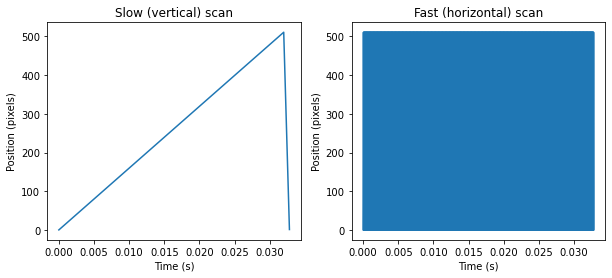

In [5]:
# Create a figure
fig_1 = pyplot.figure(1, figsize=(10,4))

# Add two subplots
ax1_1 = fig_1.add_subplot(121)
ax1_2 = fig_1.add_subplot(122)

# Plot the vertical scan
ax1_1.plot(myAOSLO.time, myAOSLO.slow)
# Plot the horizontal scan
ax1_2.plot(myAOSLO.time, myAOSLO.fast)

# Add some labels
ax1_1.set_xlabel('Time (s)')
ax1_1.set_ylabel('Position (pixels)')
ax1_1.set_title('Slow (vertical) scan')

ax1_2.set_xlabel('Time (s)')
ax1_2.set_ylabel('Position (pixels)')
ax1_2.set_title('Fast (horizontal) scan')

Let's examine the first few scan lines to see the sinusoidal pattern:

(0.0, 0.0001)

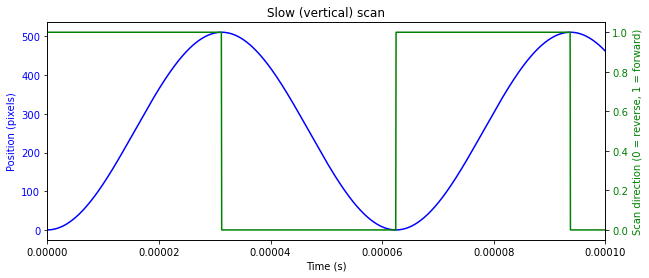

In [6]:
# Create a figure
fig_2 = pyplot.figure(2, figsize=(10,4))

# Add a subplot with two y-axes
ax2_1_a = fig_2.add_subplot(111)
ax2_1_b = ax2_1_a.twinx()

# Plot the horizontal scan
ax2_1_a.plot(myAOSLO.time, myAOSLO.fast, color='b')
ax2_1_b.plot(myAOSLO.time, myAOSLO.scan_direction, color='g')

# Add some labels
ax2_1_a.set_xlabel('Time (s)')
ax2_1_a.set_ylabel('Position (pixels)', color='b')
ax2_1_b.set_ylabel('Scan direction (0 = reverse, 1 = forward)', color='g')
ax2_1_a.set_title('Slow (vertical) scan')
ax2_1_a.tick_params(axis='y', labelcolor='b')
ax2_1_b.tick_params(axis='y', labelcolor='g')

# Limit the x axis to examine a few scan lines
ax2_1_a.set_xlim(0,0.0001)

We can also interrogate any other parameters. Other than those in the parameter file (described above) and the time, fast scan position, slow scan position, and scan direction (indicated above), the following are also accessible:

In [7]:
sys.stdout.write('The number of samples in one frame (including the flyback): %i'%myAOSLO.n_samples)
sys.stdout.write('\nThe time resolution (pixel time; seconds) is: %.9f'%myAOSLO.time_resolution)
sys.stdout.write('\nField of view (vertical, horizontal; arcminutes): %.2f, %.2f'%(myAOSLO.fov[0], myAOSLO.fov[1]))


The number of samples in one frame (including the flyback): 537600
The time resolution (pixel time; seconds) is: 0.000000061
Field of view (vertical, horizontal; arcminutes): 56.32, 56.32

63

We can retrieve any of the parameters given in the system parameter file by getting the value from the dictionary. For example:

In [8]:
# The key for the pixel size is 'pixel_size_arcmin_y_x' - the vertical and horizontal size of the pixels (not constrained to be square)
pixel_size = myAOSLO.parameters['pixel_size_arcmin_y_x']

# Print it out to check it
sys.stdout.write('The pixel size (arcminutes): [%.2f, %.2f]'%(pixel_size[0], pixel_size[1]))

The pixel size (arcminutes): [0.11, 0.11]

41

Whenever you use ERICA, it is important to ensure that you have created an AOSLO instance with the system parameter file to match your system. You'll see examples of this in later notebooks.